# Đồ án trực quan hóa dữ liệu

## Giới thiệu  

### Lời mở đầu 

Kết thúc đồ án đầu tiên, `Thu thập dữ liệu từ SoundCloud`, nhóm đã tổng hợp được rất nhiều trường dữ liệu liên quan đến 3 chủ đề chính: `tracks`, `playlists`, `users` từ `SoundCloud`.

Trong đồ án này, nhóm sẽ từ những dữ liệu đã thu thập tiến hành trực quan hóa dữ liệu, và từ đó đưa ra các nhận xét, cảm nhận về các biểu đồ đã được trực quan.

Nhóm cam đoan đồ án là tự thực hiện, không có sự sao chép.

### Danh sách thành viên 

| Người thực hiện | MSSV |
| --- | --- |
| Nguyễn Ngọc Phước | 19127519 |
| Mạc Văn Hưng | 19127416 |
| Lữ Thế Vỹ | 19127009 |
| Nguyễn Ngọc Uyên Trang | 19127074 |

### Bảng phân công



#### Biểu đồ tracks:


| Nhiệm vụ | Tên | MSSV|
| --- | --- | --- |
| Histogram: created_at| Lữ Thế Vỹ | 19127009 |
|Scatter: duration Vs. playback_count| Lữ Thế Vỹ | 19127009 |
| Distplot: Duration| Nguyễn Ngọc Phước | 19127519 |
| Scatter: Like and repost of a track| Nguyễn Ngọc Phước | 19127519 |




#### Biểu đồ playlists


| Nhiệm vụ | Tên | MSSV|
| --- | --- | --- |
|Correlation matrix: Duration, Likes count, Reposts count and Track count| Nguyễn Ngọc Uyên Trang | 19127074 |
|Boxplot track_count| Nguyễn Ngọc Phước | 19127519 |

#### Biểu đồ users


| Nhiệm vụ | Tên | MSSV|
| --- | --- | --- |
|Histogram: created_at| Lữ Thế Vỹ | 19127009 |
|Correlation matrix: comment, duration, like, repost, download, playback | Nguyễn Ngọc Phước| 19127519 |
|Scatterplot: followings_count, followers_count| Lữ Thế Vỹ | 19127009 |

## Thực hiện đồ án

### Các câu hỏi tổng quan

Trong xuyên suốt quá trình trực quan hóa dữ liệu, việc đưa ra một tiêu chí để đánh giá quá trình tìm hiểu về dữ liệu là rất quan trọng. 

Vì lẽ đó nhóm đã họp và thống nhất được các câu hỏi cần trả lời đối với từng biểu đồ đã được trực quan trong đồ án này. Các câu hỏi ấy như sau:

- Bạn muốn tìm hiểu gì ở dữ liệu? 
- Để trả lời cho câu hỏi trên bạn đã:
    + Sử dụng những trường dữ liệu nào? Chỗ này ngoài việc nêu tên trường thì nên ghi thêm trường đó có ý nghĩa gì, chứa thông tin về cái gì?
    + Có những trường dữ liệu nào bị thiếu?
    + Kiểu dữ liệu của từng trường dữ liệu?
    + Có bất kì điểm dữ liệu nào khác thường không ?
- Ý nghĩa biểu đồ:
    + Tại sao bạn lại chọn loại biểu đồ này để plot?
    + Tau khi plot biểu đồ bạn nhận xét như thế nào về biểu đồ? 
    + Trước khi plot biểu đồ thì bạn nghĩ câu trả lời cho câu hỏi là gì? Sau khi plot biểu đồ thì bạn nhận ra mình đã đúng/sai chỗ nào?

Việc trực quan hóa dữ liệu và trả lời các câu hỏi trên sẽ đi kèm với nhau cho từng biểu đồ.

### Trực quan hóa dữ liệu

#### Import thư viện

Để thực hiện đồ án này, nhóm đã tìm hiểu và ứng dụng các thư viện được liệt kê sau, trong đó `pandas` và `seaborn` là 2 thư viện trọng tâm dùng để rút trích dữ liệu và trực quan hóa.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Dữ liệu tracks đã thu thập

In [18]:
df = pd.read_csv (r'./tracks_file.csv',sep='\t')

##### Histogram: created_at

###### Trực quan hóa

In [19]:
df['created_at'] = pd.to_datetime(df['created_at']) # convert string data to datetime object
print(df['created_at'].dt.year.value_counts())

2021    6411
2014    1195
2015    1084
2016     942
2013     853
2020     729
2017     608
2019     574
2018     525
2012     439
2011     247
2010      57
2009       5
2008       2
2007       1
Name: created_at, dtype: int64


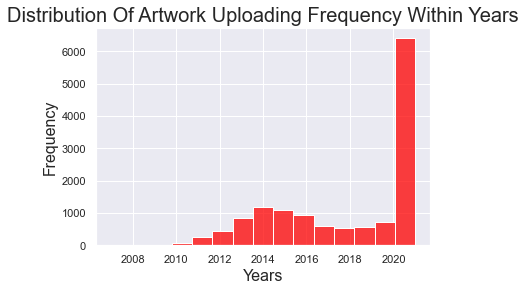

<Figure size 720x576 with 0 Axes>

In [20]:
sns.set(style="darkgrid")
sns.histplot(data=df['created_at'].dt.year, kde=False, color='red', bins=15)
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Distribution Of Artwork Uploading Frequency Within Years', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
plt.clf()

###### Nhận xét

- Trong khoảng thời gian từ năm 2007 đến hiện tại năm 2021, cột mốc nào ghi nhận SoundCloud trở thành nền tảng phân phối âm nhạc lớn với số ấn phẩm cao kỉ lục?
- **Phân tích**:
    + Sử dụng trường dữ liệu created_at: là một Series ghi nhận thời gian tạo tài khoản của các user, với kiểu định dạng datetime64 
    + Trường created_at không có mất mát dữ liệu
    + Kiểu dữ liệu: datetime64
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Histogram để trực quan hoá vì thuận tiện cho việc thống kê phân phối tần suất của các mốc thời gian
    + Phân phối lệch phải
    + Tần suất: cao nhất (năm 2021/ 6411 lần), thấp nhất (năm 2007/ 1 lần)
    + Trước khi trực quan hoá, dự đoán câu trả lời là năm 2021 vì theo ước tính thời gian càng về sau thì số lượng ấn phẩm sẽ càng nhiều do mức độ phổ biến của SoundCloud phát triển luỹ tiến. Dựa theo biểu đồ trực quan thì suy đoán này là đúng, năm 2021 ghi nhận số lượng ấn phẩm được phát hành cao kỉ lục, gấp 6 lần năm trước (năm 2020)

##### Distplot: Duration

###### Trực quan hóa

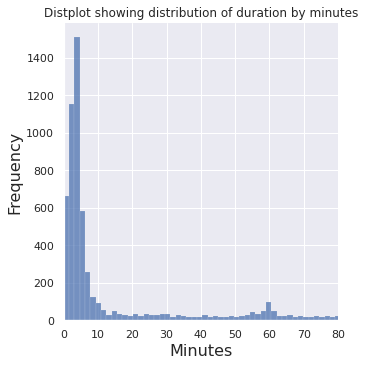

<Figure size 720x576 with 0 Axes>

In [5]:
ax = sns.displot(x=df['duration'] / 1000 / 60)
ax.set(xlim=(0, 80)) # adjust this value
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Minutes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distplot showing distribution of duration by minutes')
plt.show()
plt.clf()


###### Nhận xét


- Mỗi track được upload lên SoundCloud thường có độ phân bố như thế nào?
- **Phân tích**:
    + Sử dụng trường dữ liệu duration (thời gian của một bài hát, đơn vị phút)
    + Trường duration không có mất mát dữ liệu
    + Kiểu dữ liệu: int
    + Mặc dù có dữ liệu có những outliner là các track có thời gian quá cao, nhưng tần suất xuất hiện của những điểm dữ liệu này không đáng kể, để trực quan hóa rõ ràng hơn, nhóm sẽ chỉ trực quan những điểm có số phút bé hơn 80, tức phân bố của những track bé hone 100 phút
- **Ý nghĩa biểu đồ**:
    + Ở đây distplot được sử dụng vì đây là biểu đồ thể hiện phân bố của biến rõ ràng, rất thích hợp cho trường dữ liệu có giá trị liên tục, ở đây cụ thể là trường duration (theo phút)
    + Trước khi trực quan hoá, nhóm tin rằng việc các track up lên soundcloud tất nhiên sẽ có những track cực ngắn, hoặc cực dài, nhưng sẽ tập trung chủ yếu vào khoảng 3-4 phút.
    + Sau khi trực quan hoá, ta thấy rằng: duration của một bài hát thông thường trên soundcloud rơi vào khoảng 4-5 phút, điều này không quá chênh lệch với dự đoán ban đầu, tuy nhiên cần lưu ý một điểm rằng cũng có một số nhiều track rơi vào khoảng 60 phút, đây có lẽ là một trend up các bài nhạc tổng hợp, hoặc lofi, hoặc nhạc không lời nào đó cho đủ thời gian 1 tiếng chăng?

##### Scatter: duration Vs. playback_count

###### Trực quan hóa

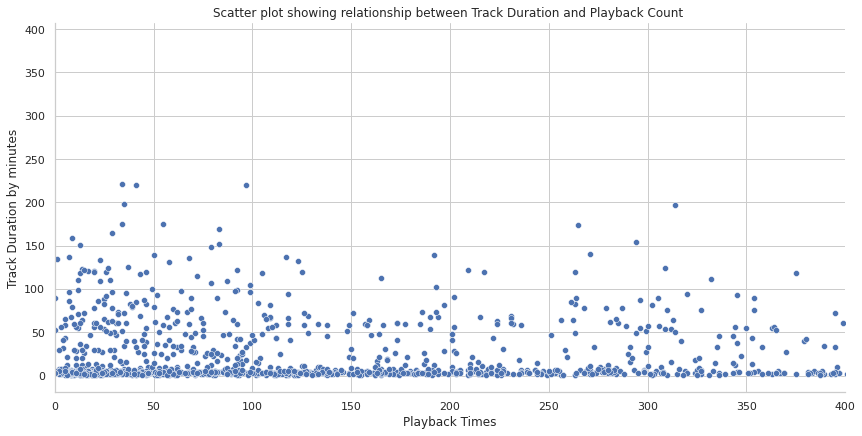

<Figure size 720x576 with 0 Axes>

In [6]:
# fig = plt.figure()
sns.set(style='whitegrid')
ax = sns.relplot(x=df['playback_count'], y=df['duration'] / 1000/ 60, kind='scatter',
            height=6, aspect=2)
ax.set(xlim=(0, 400)) # adjust this line or comment this line

plt.xlabel('Playback Times')
plt.ylabel('Track Duration by minutes')
plt.title('Scatter plot showing relationship between Track Duration and Playback Count ')
plt.ticklabel_format(style='plain', axis='y')
# fig.subplots_adjust(right=2.000,bottom=-1.000)
plt.show()
plt.clf()

###### Nhận xét

- Mối quan hệ giữa 2 trường duration và playback_count của một track là đồng biến, nghịch biến hay không có tương quan?
- **Phân tích**:
    + Sử dụng trường dữ liệu duration (thời gian của một bài hát, đơn vị phút - đã qua biến đổi từ milisecond) và playbacks_count (số lần phát lặp lại của bài hát)
    + Trường duration và playbacks_count đều không có mất mát dữ liệu
    + Kiểu dữ liệu: cả 2 trường này đều có kiểu dữ liệu số.
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Scatterplot để trực quan hoá vì nó phù hợp với nhu cầu thể hiện rõ ràng mối quan hệ của hai trường duration và playbacks_count
    + Biểu đồ phân tán rời rạc, không theo xu hướng nào: hai trường không có mối tương quan
    + Trước khi trực quan hoá, dự đoán câu trả lời là nếu duration càng ngắn thì số lượt playback càng cao (vì thời gian ngắn, user sẽ phát nghe lại nhiều lần)
    + Sau khi trực quan hoá, ta thấy rằng: số lượt playback không phụ thuộc vào duration của một bài hát, duration có thể dài nhưng số lượt playback có thể là nhiều hoặc ít, không theo quy luật nào cả, phụ thuộc vào sở thích gu âm nhạc của user.

##### Scatter: Like and repost of a track

###### Trực quan hóa

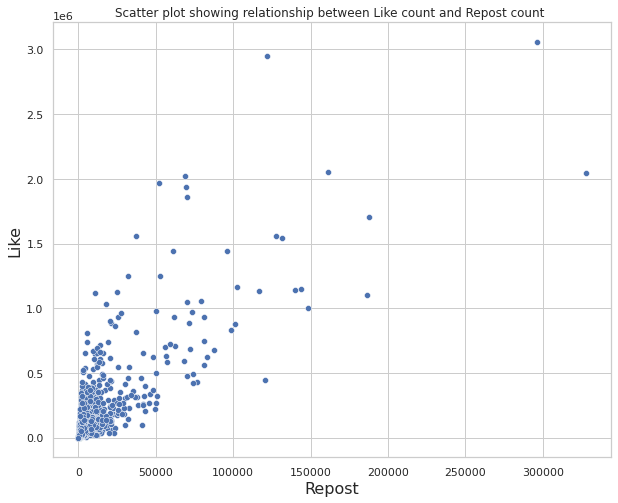

<Figure size 720x576 with 0 Axes>

In [7]:
sns.set(style='whitegrid')
ax = sns.scatterplot(x=df['reposts_count'], y=df['likes_count']) 

plt.xlabel('Repost', fontsize=16)
plt.ylabel('Like', fontsize=16)
plt.title('Scatter plot showing relationship between Like count and Repost count ')
plt.show()
plt.clf()


###### Nhận xét

- Track nhiều like thì có nhiều repost và ngược lại không?
- **Phân tích**:
    + Sử dụng trường dữ liệu like_count (lượt like), repost_count (lượt repost)
    + Một số ít ở 2 trường này có sự mất mát về dữ liệu, tuy nhiên `seaborn` sẽ bỏ qua các điểm này theo mặc định.
    + Kiểu dữ liệu: int
    + Dữ liệu không có sự bất thường, bởi đây là 2 dữ liệu thực tế, quan trọng của mỗi track
- **Ý nghĩa biểu đồ**:
    + Scatterplot được sử dụng với mong muốn tìm sự tương quan giữa 2 trường dữ liệu này, chúng có quan hệ, ảnh hưởng như thế nào với nhau, và mức độ của sự ảnh hưởng này.
    + Trước khi trực quan hoá, nhóm tin rằng việc các track nhiều like thì hiển nhiên cũng sẽ nhiều repost.
    + Sau khi trực quan hoá, ta thấy rằng: 2 trường dữ liệu này có quan hệ với nhau, nhiều like thường thì cũng có nhiều repost vì ta có thể thấy các điểm dữ liệu phân tán hướng lên góc phải trên. Tuy nhiên cũng có nhiều trường hợp lượt like nhiều nhưng lại ít repost và ngược lại, nên có thể kết luận mức độ ảnh hưởng của 2 trường này với nhau không quá mạnh, nhưng chắc chắn có sự ảnh hưởng.

#### Dữ liệu playlists đã thu thập

In [8]:
df = pd.read_csv (r'./playlists_file.csv',sep='\t')


##### Boxplot track_count

###### Trực quan hóa 

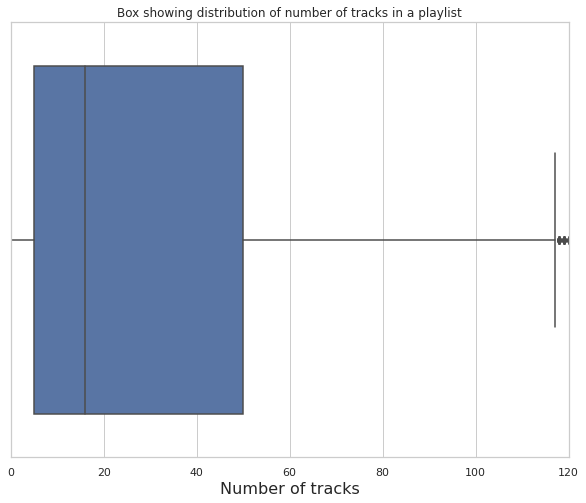

<Figure size 720x576 with 0 Axes>

In [9]:
ax = sns.boxplot(x=df['track_count'])
ax.set(xlim=(0, 120)) # adjust this value
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Number of tracks', fontsize=16)
plt.title('Box showing distribution of number of tracks in a playlist')
plt.show()
plt.clf()


###### Nhận xét

- Phân bố số lượng track trong 1 playlist
- **Phân tích**:
    + Sử dụng trường dữ liệu track_count: là trường chỉ số lượng track trong 1 playlist
    + Trường track_count không có mất mát dữ liệu
    + Kiểu dữ liệu: trường mang dữ liệu số
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Boxplot để loại đi các outliner không cần thiết, chỉ tập trung vào phân bố chính Đó cũng là lý do nhóm chọn giới hạn trục x còn (0, 120)
    + Trước khi trực quan hóa, nhóm nghĩ rằng một playlist thông thường có khoảng dưới 10 track.
    + Nhìn vào biểu đồ ta có thể thấy phân bố chính của số lượng track trong 1 playlist thường nằm trong khoảng từ dưới 10 tới khoảng 50. Trong đó số lượng các track chủ yếu phân bố vào khoảng 15 track 1 playlist, đây là số lượng phù hợp các track trong 1 playlist, tuy có nhiều hơn số lượng ban đầu trông đợi.

##### Correlation matrix: Duration, Likes count, Reposts count and Track count

###### Trực quan

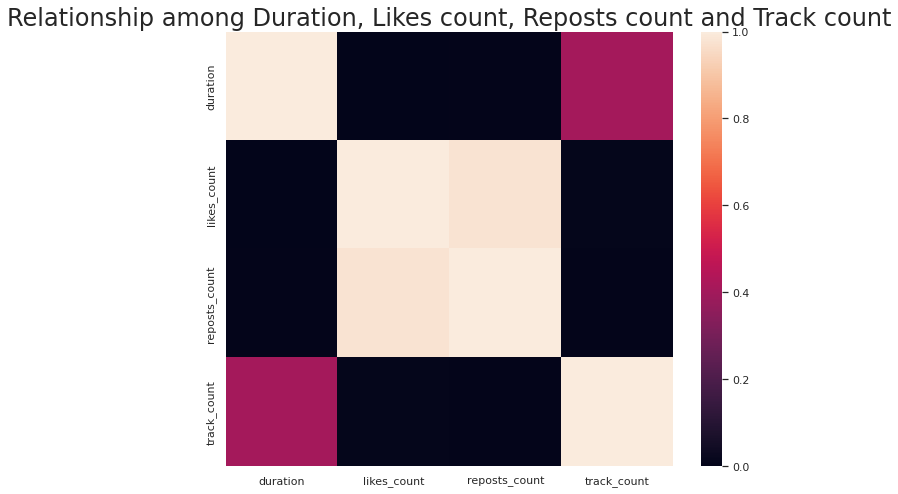

In [10]:
df_corr = df[['duration','likes_count','reposts_count','track_count']]

sns.heatmap(df_corr.corr())
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Duration, Likes count, Reposts count and Track count",size = 24)
plt.show()

###### Nhận xét

- Câu hỏi: Liệu rằng thời lượng(`duration`), lượt thích(`likes_count`), lượt đăng lại(`reposts_count`) và số lượng bài hát(`track_count`) có mối liên hệ gì với nhau hay không?

- Chuẩn bị dữ liệu: Các trường dữ liệu cần thiết:
    
        duration: thời lượng của 1 playlist
        likes_count: số lượt thích của 1 playlist
        reposts_count: số lượt đăng lại của 1 playlist
        track_count: số lượng bài hát trong 1 playlist
        
- Biểu đồ: Sử dụng biểu đồ nhiệt để biểu diễn sự tương quan giữa các biến

- Dự đoán: Các playlist có càng nhiều bài hát thì sẽ có thời lượng càng dài. Thông thường, người ta chọn nghe playlist là vì muốn nghe được nhiều bài hát cùng chủ đề, vì vậy số lượng bài hát trong 1 playlist càng nhiều thì sẽ có càng nhiều lượt thích. Và khi người ta đã thích thì khả năng playlist được đăng lại sẽ cao hơn.

- Kết quả: 
    
  -Số lượng bài hát trong 1 playlist có vẻ không ảnh hưởng nhiều đến thời lượng của 1 playlist. Nguyên nhân có thể là do các bài hát trong 1 playlist có thời lượng ngắn
    
  -Số lượt thích của 1 playlist có ảnh hưởng đến lượt đăng lại của playlist đó (đúng như dự đoán). Tuy nhiên, thời lượng của 1 playlist lại hoàn toàn không liên quan đến lượt thích của playlist đó. Ta có thể lý giải điều này là vì người dùng có thể không thích một số bài hát trong playlist đó, hoặc có thể là do thời lượng của playlist dài quá, người dùng nghe xong thì quên bấm like
    

#### Dữ liệu users đã thu thập

In [4]:
df = pd.read_csv (r'./users_file.csv',sep='\t')


##### Histogram: created_at

###### Trực quan hóa

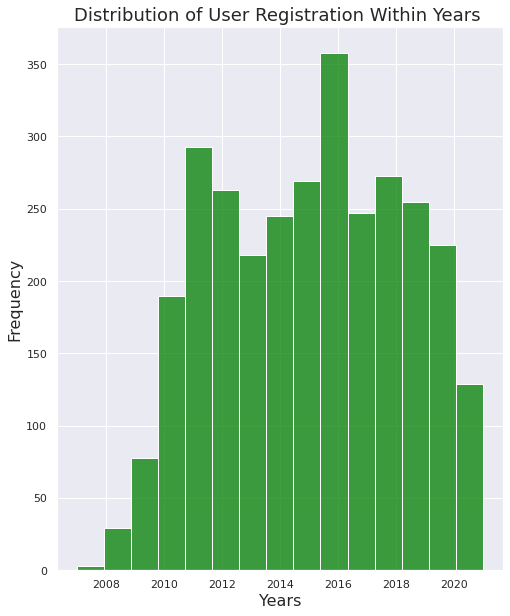

<Figure size 720x576 with 0 Axes>

In [12]:
df['created_at'] = pd.to_datetime(df['created_at']) # convert string data to datetime object
sns.set(style="darkgrid")
sns.histplot(data=df['created_at'].dt.year, kde=False, color='green', bins=15)
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Distribution of User Registration Within Years ', fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
plt.clf()

###### Nhận xét

- Năm cột mốc nào mà SoundCloud trở nên phổ biến với số lượt người đăng kí cao vượt trội trong khoảng thời gian phát triển từ năm 2007 đến hiện tại (năm 2021)? 
- **Phân tích**:
    + Sử dụng trường dữ liệu created_at: là một Series ghi nhận thời gian tạo tài khoản của các user, với kiểu định dạng datetime64 
    + Trường created_at không có mất mát dữ liệu
    + Kiểu dữ liệu: datetime64
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Histogram để trực quan hoá vì thuận tiện cho việc thống kê phân phối tần suất của các mốc thời gian
    + Phân phối hai đỉnh: năm 2011 và năm 2016 
    + Tần suất: cao nhất (năm 2016/ 358 lần), thấp nhất (năm 2007/ 3 lần)
    + Trước khi trực quan hoá, dự đoán câu trả lời là năm 2021 vì theo ước tính thời gian càng về sau mức độ phổ biến càng tăng cao. Nhưng khi có biểu đồ, kết quả dự đoán đã trở thành sai, vì tuỳ mỗi thời điểm sẽ có các yếu tố khác nhau tác động (bài hát yêu thích có mặt trên SoundCloud, cải tiến website thu hút sự chú ý của người dùng,...) đến lưu lượng người dùng đăng kí, chứ không phải suy luận dựa theo thời gian luỹ tiến.

##### Correlation matrix: comment, duration, like, repost, download, playback

###### Trực quan hóa

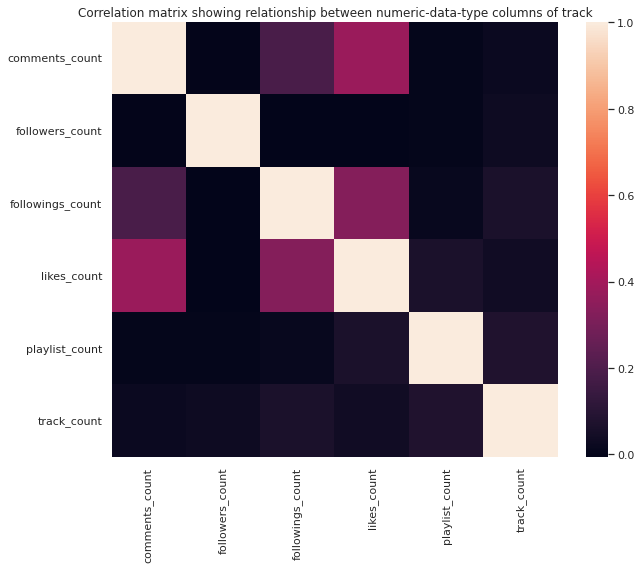

In [13]:
df1 = df[['comments_count','followers_count','followings_count','likes_count','playlist_count','track_count']]
sns.heatmap(df1.corr())
plt.title('Correlation matrix showing relationship between numeric-data-type columns of track');

###### Nhận xét

- Quan hệ giữa các trường quan trọng của 1 users?
- **Phân tích**:
    + Sử dụng trường dữ liệu like_count (lượt like), repost_count (lượt repost)
    ```
    `comments_count`: Số lượt comment của của users
    `followers_count`: Số người đang follow users này
    `followings_count`: Số người mà người này đang follow
    `likes_count`: Số lượt like của người này
    `playlist_count`: Số playlist mà người này đã đăng
    `track_count`: Số track mà người này đã đăng
    ```
    + Ở từng trường có các ô bị thiếu dữ liệu, tuy nhiên seaborn sẽ loại đi nên không mấy ảnh hưởng
    + Kiểu dữ liệu: các trường này đều mang dữ liệu số
    + Dữ liệu không có sự bất thường.
- **Ý nghĩa biểu đồ**:
    + Correlation heatmap được sử dụng với mong muốn tìm sự tương quan giữa tất cả các trường dữ liệu này, chúng có quan hệ, ảnh hưởng như thế nào với nhau, và mức độ của sự ảnh hưởng này, cũng như sự đồng biến, nghịch biến của các trường dữ liệu trên với nhau. Đây là cái nhìn tổng quan đối với các trường này.
    + Trước khi thực hiện biểu đồ, nhóm mong muốn thấy được quan hệ đồng biến, nghịch biến giữa các trường này một cách tổng quan.
    + Sau khi qua các biểu đồ đã plot để thể hiện các quan hệ riêng lẻ giữa một số cặp trường, và qua heatmap trên, nhóm thấy được một số quan hệ sau:
        - like, following và comment là 3 trường có mối quan hệ ảnh hưởng mạnh mẽ với nhau, chúng có sự tương quan đồng biến. Điều này là hợp lý khi cân nhắc đến sự ảnh hưởng của một user nổi tiếng
        - Số track sở hữu có sự đồng biến đối với hầu hết các trường khác, tuy nhiên mức độ này tương đối thấp
        - Số lượng playlist có quan hệ tương quan khá thấp với các trường khác

##### Scatterplot: followings_count, followers_count

###### Trực quan hóa

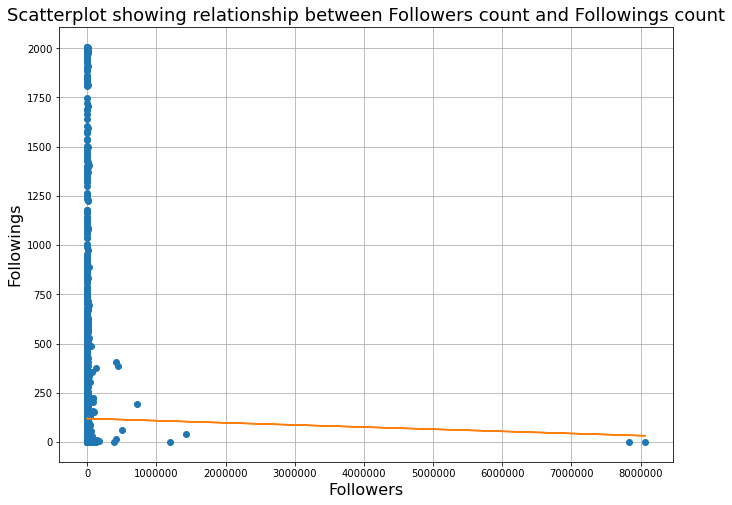

<Figure size 432x288 with 0 Axes>

In [17]:
x = df['followers_count']
y = df['followings_count']
plt.figure(figsize=(11, 8))
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Followers', fontsize=16)
plt.ylabel('Followings', fontsize=16)
plt.title('Scatterplot showing relationship between Followers count and Followings count', fontsize=18)
plt.grid()
plt.show()
plt.clf()

###### Nhận xét

- Mối quan hệ giữa 2 trường followings_count và followers_count của một user là đồng biến, nghịch biến hay không có tương quan?
- **Phân tích**:
    + Sử dụng trường dữ liệu followers_count và followings_count: chứa tập hợp số chỉ số lượng người theo dõi user đó hoặc là user đang theo dõi từng đấy người.
    + Trường followers_count và followings_count đều không có mất mát dữ liệu
    + Kiểu dữ liệu: int64
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Scatterplot để trực quan hoá vì nó phù hợp với nhu cầu thể hiện rõ ràng mối quan hệ của hai trường followers_count và followings_count
    + Slope (độ dốc) hướng xuống: dốc âm, thể hiện mối tương quan đối nghịch
    + Trước khi trực quan hoá, dự đoán câu trả lời là mối quan hệ giữa hai trường followers_count và followings_count là đối nghịch. Sau khi trực quan hoá, cho thấy rằng dự đoán là đúng: user càng nhiều người theo dõi (follower) sẽ theo dõi rất ít số lượng user khác (following)

## Tham khảo

- https://seaborn.pydata.org/
- https://pandas.pydata.org/docs/
- https://matplotlib.org/